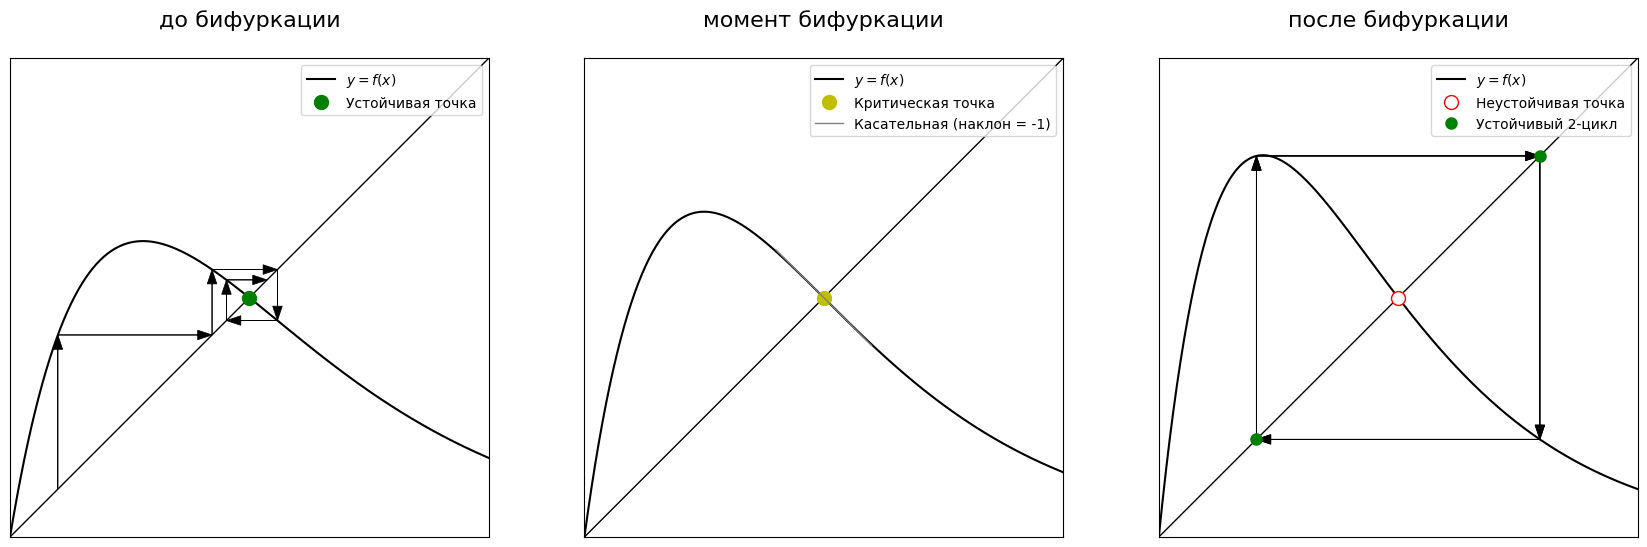

In [10]:
# Модель Рикера

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x, r):
    return x * np.exp(r * (1 - x))

r_values = [1.8, 2.0, 2.3]
titles = ["до бифуркации", "момент бифуркации", "после бифуркации"]

fig, axes = plt.subplots(1, 3, figsize=(21, 7))

for ax, r, title in zip(axes, r_values, titles):
    ax.set_aspect('equal')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=16, y=1.05)

    x_range = np.linspace(0, 2, 400)
    ax.plot(x_range, f(x_range, r), 'k-', lw=1.5, label=r'$y=f(x)$')
    ax.plot(x_range, x_range, 'k-', lw=1)

    # до бифуркации
    if r < 2.0:
        x_n = 0.2
        for _ in range(4):
            y_next = f(x_n, r)
            ax.arrow(x_n, x_n, 0, y_next - x_n, head_width=0.04, fc='k', ec='k', length_includes_head=True, lw=0.5)
            ax.arrow(x_n, y_next, y_next - x_n, 0, head_width=0.04, fc='k', ec='k', length_includes_head=True, lw=0.5)
            x_n = y_next
        ax.plot(1, 1, 'go', markersize=10, label='Устойчивая точка')

    # момент бифуркации
    elif r == 2.0:
        ax.plot(1, 1, 'yo', markersize=10, label='Критическая точка')
        tangent_x = np.array([0.8, 1.2])
        tangent_y = -1 * (tangent_x - 1) + 1
        ax.plot(tangent_x, tangent_y, 'gray', lw=1, label='Касательная (наклон = -1)')

    # после бифуркации
    else:
        x_n = 0.2
        for _ in range(50):
            x_n = f(x_n, r)

        for _ in range(4):
            y_next = f(x_n, r)
            ax.arrow(x_n, x_n, 0, y_next - x_n, head_width=0.04, fc='k', ec='k', length_includes_head=True, lw=0.5)
            ax.arrow(x_n, y_next, y_next - x_n, 0, head_width=0.04, fc='k', ec='k', length_includes_head=True, lw=0.5)
            x_n = y_next

        ax.plot(1, 1, 'ro', markersize=10, markerfacecolor='white', markeredgecolor='r', label='Неустойчивая точка')

        cycle_point_1 = fsolve(lambda x: f(f(x, r), r) - x, 0.5)[0]
        cycle_point_2 = fsolve(lambda x: f(f(x, r), r) - x, 1.5)[0]
        ax.plot([cycle_point_1, cycle_point_2], [cycle_point_1, cycle_point_2],
                'go', markersize=8, linestyle='none', label='Устойчивый 2-цикл')

    ax.legend(loc='upper right', fontsize='medium')

plt.show()

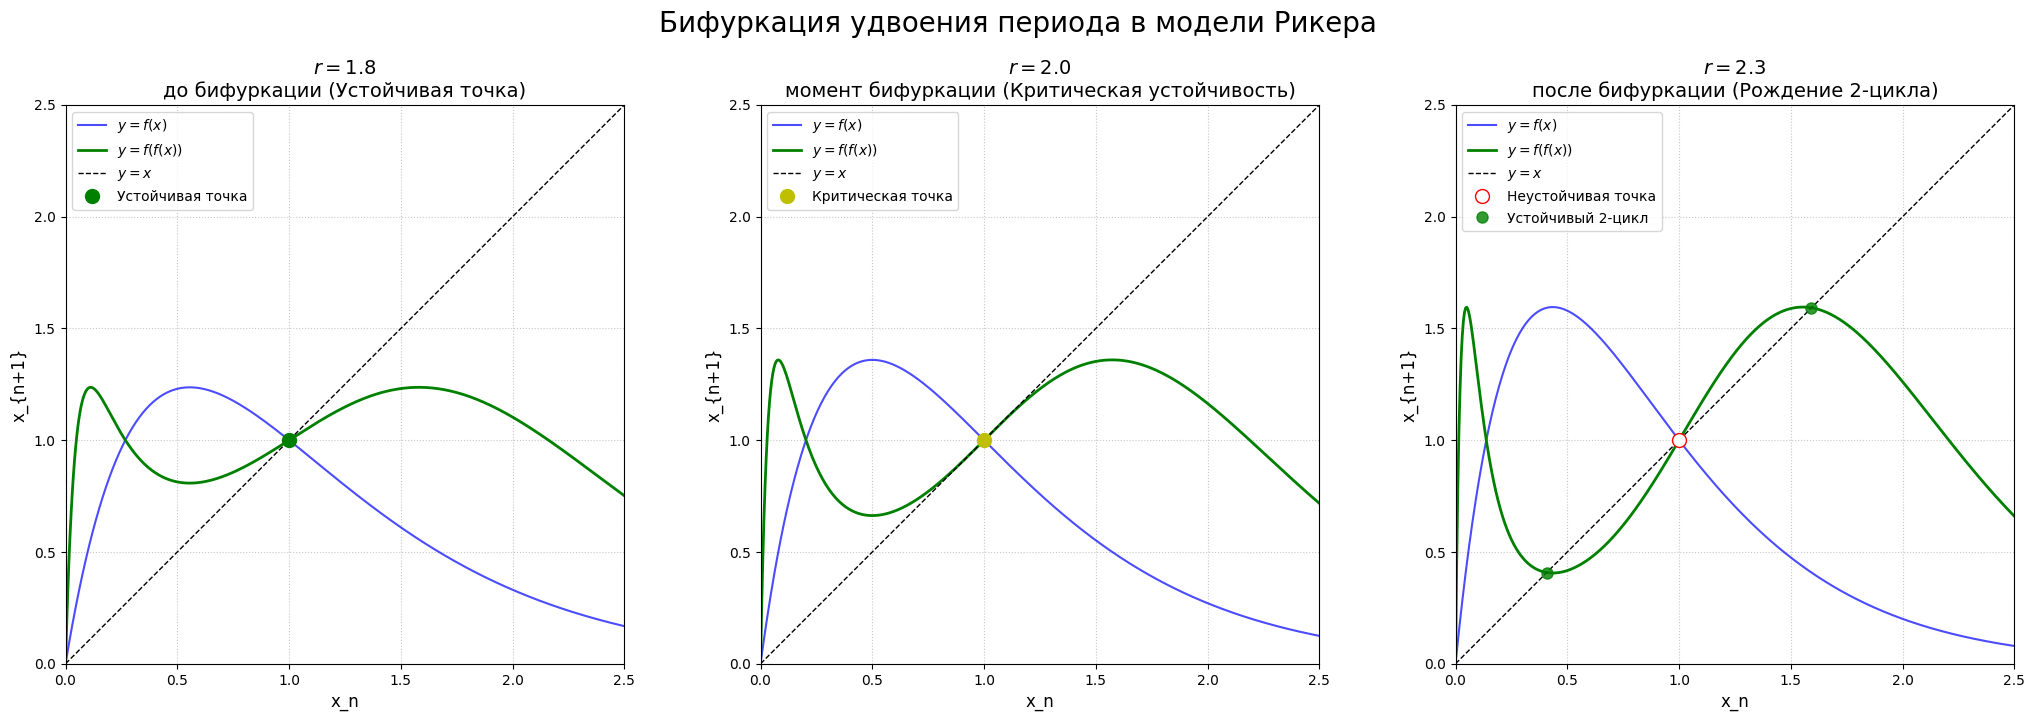

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, r):
    return x * np.exp(r * (1 - x))

def f2(x, r):
    return f(f(x, r), r)

r_values = [1.8, 2.0, 2.3]
subtitles = [
    "до бифуркации (Устойчивая точка)",
    "момент бифуркации (Критическая устойчивость)",
    "после бифуркации (Рождение 2-цикла)"
]

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle('Бифуркация удвоения периода в модели Рикера', fontsize=20)

x_range = np.linspace(0, 2.5, 500)

for ax, r, subtitle in zip(axes, r_values, subtitles):
    # 1
    ax.plot(x_range, f(x_range, r), 'b-', lw=1.5, alpha=0.7, label=r'$y=f(x)$')
    ax.plot(x_range, f2(x_range, r), 'g-', lw=2, label=r'$y=f(f(x))$')
    ax.plot(x_range, x_range, 'k--', lw=1, label=r'$y=x$')

    # 2
    multiplier = 1 - r
    if np.abs(multiplier) < 1:
        ax.plot(1, 1, 'go', markersize=10, label='Устойчивая точка')
    elif np.abs(multiplier) > 1:
        ax.plot(1, 1, 'ro', markersize=10, markerfacecolor='white', label='Неустойчивая точка')
    else:
        ax.plot(1, 1, 'yo', markersize=10, label='Критическая точка')

    # 3
    if r > 2.0:
        from scipy.optimize import fsolve
        cycle_point_1 = fsolve(lambda x: f2(x, r) - x, 0.5)[0]
        cycle_point_2 = fsolve(lambda x: f2(x, r) - x, 1.5)[0]
        ax.plot([cycle_point_1, cycle_point_2], [cycle_point_1, cycle_point_2],
                'go', markersize=8, alpha=0.8, linestyle='none', label='Устойчивый 2-цикл')

    ax.set_title(fr"$r = {r}$" + f"\n{subtitle}", fontsize=14)
    ax.set_xlabel('x_n', fontsize=12)
    ax.set_ylabel('x_{n+1}', fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()
    ax.set_xlim(0, 2.5)
    ax.set_ylim(0, 2.5)
    ax.set_aspect('equal')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()